In [7]:
# Test1 test difference matrices
include("./src/finite_diff.jl")
using Printf
# pbc f(0,y) = f(x_max,y),f(x,0) = f(x,y_max)
# descritization: delta_x = x_max/nx, delta_y = y_max/ny
# descretised field f[1 2... nx, 1 2... ny] 
# pbc: f[0,...] = f[nx,...] and f[...,0]=f[...,ny]
# f[0,...] and f[... ,0] are not included in the lattice 

x_max = y_max = 2.0*pi
nx = 64
ny = 64
N = nx*ny
delta_x = x_max/nx
delta_y = y_max/ny

x = range(delta_x,2*pi,nx)
y = transpose(range(delta_y,2*pi,ny))
f = @. sin(x)*cos(2.0*y)

# 0th order derivative
exact_derivatives = Dict((0,0)=>f)
# first derivatives(exact)
exact_derivatives[(1,0)] = @. cos(x)*cos(2.0*y)      #df/dx
exact_derivatives[(0,1)] = @. -2.0*sin(x)*sin(2.0*y) # dy/dx
# second derivatives(exact)
exact_derivatives[(2,0)] = @. -sin(x)*cos(2.0*y)     #d2f/dx2
exact_derivatives[(0,2)] = @. -4.0*sin(x)*cos(2.0*y) #d2d/dy2
exact_derivatives[(1,1)] = @. -2.0*cos(x)*sin(2.0*y) #d2/dxdy
# third derivatives(exact)
exact_derivatives[(3,0)] = @. -cos(x)*cos(2.0*y)     #d3f/dx3
exact_derivatives[(2,1)] = @. 2.0*sin(x)*sin(2.0*y) #d/dy d2f/dx2 
exact_derivatives[(1,2)] = @. -4.0*cos(x)*cos(2.0*y) #d/dx d2f/dy2 
exact_derivatives[(0,3)] = @. 8.0*sin(x)*sin(2.0*y)  #d3f/dy3 
# fourth derivatives(exact)
exact_derivatives[(4,0)] = @. sin(x)*cos(2.0*y)       #d4f/dx4
exact_derivatives[(3,1)] = @. 2.0*cos(x)*sin(2.0*y)   #d/dy d3f/dx3 
exact_derivatives[(2,2)] = @. 4.0*sin(x)*cos(2.0*y)   #d^2/dx^2 d2f/dy2 
exact_derivatives[(1,3)] = @. 8.0*cos(x)*sin(2.0*y)  #d^4f/dy4
exact_derivatives[(0,4)] = @. 16.0*sin(x)*cos(2.0*y)  #d^4f/dy4

println(size(exact_derivatives[(0,4)]))
for odx in 0:4
    for ody in 0:4
        if odx + ody <= 4 && odx + ody > 0
            if odx == 0
                Dx = 1.0
            else
                Dx = diff_mat2D(nx,ny,1,odx)/(delta_x^odx)
            end
            if ody == 0
                Dy = 1.0
            else
                Dy = diff_mat2D(nx,ny,2,ody)/(delta_y^ody)
            end
            cdiff = Dx*Dy*reshape(f,(N,1))
            cdiff = reshape(cdiff,(nx,ny))
            rmse = sqrt(1.0/N*sum((cdiff - exact_derivatives[(odx,ody)]).^2))
            @printf("RMSE for [d/dx]^%i [d/dy]^%i is %1.8f \n",odx,ody,rmse)
        end
    end
end

(64, 64)


LoadError: UndefVarError: diff_mat2D not defined

In [18]:
x_max = y_max = 2.0*pi
nx = 4
ny = 4
N = nx*ny
cdiff = diff_mat2D(nx,ny,1,1)

16×16 SparseMatrixCSC{Float64, Int64} with 32 stored entries:
⡪⡪⠀⠀⠀⠀⠀⠀
⠀⠀⡪⡪⠀⠀⠀⠀
⠀⠀⠀⠀⡪⡪⠀⠀
⠀⠀⠀⠀⠀⠀⡪⡪

In [23]:
a,b = findnz(cdiff)
c = cdiff.colptr
r = cdiff.rowval
cdiff

16×16 SparseMatrixCSC{Float64, Int64} with 32 stored entries:
⡪⡪⠀⠀⠀⠀⠀⠀
⠀⠀⡪⡪⠀⠀⠀⠀
⠀⠀⠀⠀⡪⡪⠀⠀
⠀⠀⠀⠀⠀⠀⡪⡪

read_parameters (generic function with 1 method)

Dict{String, Any} with 17 entries:
  "time_shceme"          => "predictor-corrector"
  "T"                    => 1.0
  "C"                    => 1.0
  "dt"                   => 0.01
  "bc"                   => "periodic"
  "npts"                 => Any[256, 256]
  "compress"             => "yes"
  "B"                    => 1.0
  "plotting_measurement" => "yes"
  "Gamma"                => 1.0
  "range"                => Any[10.0, 10.0]
  "measuring"            => "yes"
  "n_save"               => 1000
  "A"                    => 1.0
  "iv"                   => "random_uniform"
  "making_movie"         => "yes"
  "n_steps"              => 100000

Dict{String, Any} with 17 entries:
  "time_shceme"          => "predictor-corrector"
  "T"                    => 1.0
  "C"                    => 1.0
  "dt"                   => 0.01
  "bc"                   => "periodic"
  "npts"                 => Any[256, 256]
  "compress"             => "yes"
  "B"                    => 1.0
  "plotting_measurement" => "yes"
  "Gamma"                => 1.0
  "range"                => Any[10.0, 10.0]
  "measuring"            => "yes"
  "n_save"               => 1000
  "A"                    => 1.0
  "iv"                   => "random_uniform"
  "making_movie"         => "yes"
  "n_steps"              => 100000

In [2]:

using Plots

In [3]:

x = collect(range(0,5.0,100))
println(typeof(x))
y = collect(range(0,5.0,100))'
z = @. exp(-(x-2.0)*(x-2) -(y-4)*(y-4))'
heatmap(x,y',z,aspect_ratio=:equal,tellheight=true)



Vector{Float64}


LoadError: UndefVarError: heatmap not defined

In [2]:

x = collect(range(0,10.0,100))
y = collect(range(0,10.0,100))'
z = @. sin(2x + 10*y)'
println(x[2]-x[1])
#heatmap(x,y',z,aspect_ratio=:equal,tellheight=true)
using FFTW
f = fftshift(abs.(fft(z)))
kx = fftshift(fftfreq(100, 100))*2*pi/10.0
println(kx)
println(size(f))
heatmap(kx,kx,f,aspect_ratio=:equal,tellheight=true)

0.10101010101010101
-31.41592653589793:0.6283185307179586:30.787608005179973
(100, 100)


LoadError: UndefVarError: heatmap not defined

Archive:  ../mean_field_model/data/Frame_0.zip
  inflating: ../mean_field_model/data/Frame_0.json  
Matrix{Float64}


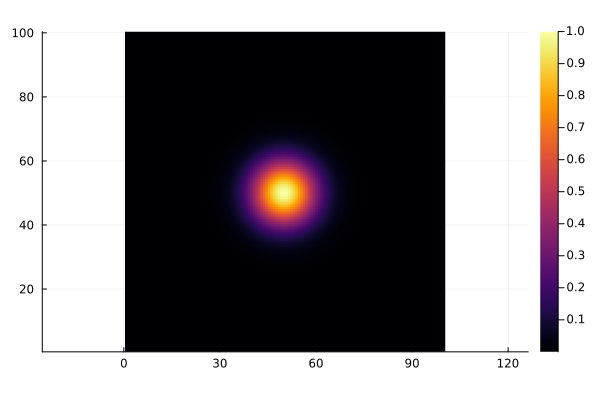

In [78]:
include("./src/utils.jl")
using Plots
data_dir = "../mean_field_model/data"
dl = DataLoader(data_dir)
delta_x = dl.info["range"][1] / dl.info["npts"][1]
delta_y = dl.info["range"][2] / dl.info["npts"][2]
nx, ny = dl.info["npts"][1],dl.info["npts"][2]
x = range(delta_x, dl.info["range"][1], nx)
y = range(delta_y, dl.info["range"][2], ny)
n_step,data = load(dl)
rho = reshape(Array{Float64}(data["rho"]),(nx,ny))
println(typeof(rho))
heatmap(x,y,rho',aspect_ratio=:equal,tellheight=true)



In [80]:
n_step,data = load(dl)
print(n_step)
rho = reshape(Array{Float64}(data["rho"]),(nx,ny))
h = heatmap(x,y,rho',aspect_ratio=:equal,tellheight=true)
xlims!(0,100)
ylims!(0,100)
println(typeof(h))

Archive:  ../mean_field_model/data/Frame_100.zip
  inflating: ../mean_field_model/data/Frame_100.json  
100Plots.Plot{Plots.GRBackend}


7.979645340118075
-8.042477193189871


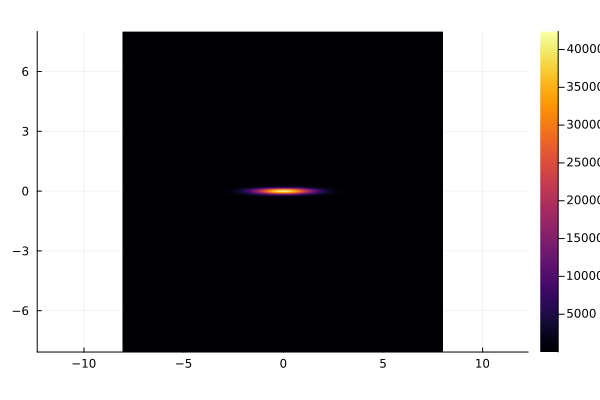

In [31]:
using Plots
x_max,y_max = 100.0,100.0
n = 256
dx,dy = x_max/n,y_max/n
x = collect(range(dx,x_max,n))
y = collect(range(dy,y_max,n))'
sx,sy = 1.0,10.0
rho0 = @. exp(-((x-0.5*x_max)/sx)^2 -((y-0.5*y_max)/sy)^2)
using FFTW
f = fftshift(fft(rho0))
kx = fftshift(fftfreq(n, n))*2.0*pi/x_max
ky = fftshift(fftfreq(n, n))*2.0*pi/y_max
s_rho = real(f.*conj(f))
println(maximum(ky))
println(ky[1])

heatmap(kx,ky,s_rho',aspect_ratio=:equal,tellheight=true)

In [41]:
a = 1
b = 2
maximum([a,b])

2

In [1]:
using DifferentialEquations

mutable struct MyODE1
    y::Array{Float64,1}
    dy::Array{Float64,1}
    x::Any
end

function MyODE1()
    MyODE1([0.0,0.0],[0.0,0.0],nothing)
end

function exp_my_ode!(m::MyODE1)
    m.dy = m.y*1.01
end

function exp_ode(dy,y,p,t)
    p.y = y
    exp_my_ode!(p)
    dy .= p.dy
end



exp_ode (generic function with 1 method)

In [9]:
ode = MyODE1()
println(ode.x)

y0 = [0.1,0.1]
prob = ODEProblem(exp_ode,y0,(0.0,1.0),ode)
integrator = init(prob,Tsit5())
println(integrator)
for t in 1:7
ode.y = integrator.u
step!(integrator,0.2,true)
println(integrator)
end
println(fieldnames(typeof(integrator)))
println(fieldnames(typeof(integrator.alg)))


nothing
t: 0.0
u: [0.1, 0.1]
t: 0.2
u: [0.12238480081654425, 0.12238480081654425]
t: 0.4
u: [0.1497803947207904, 0.1497803947207904]
t: 0.6000000000000001
u: [0.18330843775563904, 0.18330843775563904]
t: 0.8
u: [0.2243416664447395, 0.2243416664447395]
t: 1.0
u: [0.2745601016484278, 0.2745601016484278]
t: 1.2
u: [0.3360198335504637, 0.3360198335504637]
t: 1.4
u: [0.41123720402704733, 0.41123720402704733]
(:sol, :u, :du, :k, :t, :dt, :f, :p, :uprev, :uprev2, :duprev, :tprev, :alg, :dtcache, :dtchangeable, :dtpropose, :tdir, :eigen_est, :EEst, :qold, :q11, :erracc, :dtacc, :success_iter, :iter, :saveiter, :saveiter_dense, :cache, :callback_cache, :kshortsize, :force_stepfail, :last_stepfail, :just_hit_tstop, :do_error_check, :event_last_time, :vector_event_last_time, :last_event_error, :accept_step, :isout, :reeval_fsal, :u_modified, :reinitialize, :isdae, :opts, :stats, :initializealg, :fsalfirst, :fsallast)
(:stage_limiter!, :step_limiter!, :thread)


In [8]:
using Symbolics
vars = @variables x₁ x₂;
exprs = [2x₁, 3x₂, 4x₁ * x₂]

3-element Vector{Num}:
    2x₁
    3x₂
 4x₁*x₂

In [14]:
Symbolics.jacobian_sparsity(exprs, vars)

3×2 SparseArrays.SparseMatrixCSC{Bool, Int64} with 4 stored entries:
 1  ⋅
 ⋅  1
 1  1

In [21]:
"a" in ["a","y"]

true

In [4]:
"$(@__FILE__)"

"In[4]"

In [25]:
stress::Dict{Tuple{Int64, Int64},Array{Float64,2}}

x = [1. 2. 3.;4. 5. 6.]
x::Array{Float64,2}
x = [1 2 3;4 5 6;7 8 9]
a = nothing
function change(m)
    m[1,2] = 1000.0
end
#a = zeros(Float64,2,2,10)
#change(view(a,1,:,:))
stress[(1,1)] = [1 2 3;4 5 6]
change(stress[(1,1)])
println(stress)

Dict((1, 1) => [1.0 1000.0 3.0; 4.0 5.0 6.0])
